# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        city_list.append(city)
        lat_list.append(city_lat)
        lng_list.append(city_lng)
        max_temp_list.append(city_max_temp)
        humidity_list.append(city_humidity)
        cloudiness_list.append(city_clouds)
        wind_speed_list.append(city_wind)
        country_list.append(city_country)
        date_list.append(city_date)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pandan
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | murray bridge
Processing Record 4 of Set 1 | uturoa
Processing Record 5 of Set 1 | tazovsky
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | nkove
Processing Record 9 of Set 1 | hayma'
City not found. Skipping...
Processing Record 10 of Set 1 | najran
Processing Record 11 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | xinzhi
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | darwin
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | weno
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | upington
Processing Reco

Processing Record 41 of Set 4 | palmer
Processing Record 42 of Set 4 | torghay
Processing Record 43 of Set 4 | ancud
Processing Record 44 of Set 4 | port lincoln
Processing Record 45 of Set 4 | toga village
City not found. Skipping...
Processing Record 46 of Set 4 | yeniseysk
Processing Record 47 of Set 4 | kirensk
Processing Record 48 of Set 4 | ar raqqah
Processing Record 49 of Set 4 | bamboo flat
Processing Record 0 of Set 5 | el granada
Processing Record 1 of Set 5 | kongoussi
Processing Record 2 of Set 5 | kapa'a
Processing Record 3 of Set 5 | craig
Processing Record 4 of Set 5 | nainpur
Processing Record 5 of Set 5 | puerto quijarro
Processing Record 6 of Set 5 | polyarnyy
Processing Record 7 of Set 5 | ujae
Processing Record 8 of Set 5 | balabac
Processing Record 9 of Set 5 | cherdyn'
Processing Record 10 of Set 5 | puerto lempira
Processing Record 11 of Set 5 | namibe
Processing Record 12 of Set 5 | college
Processing Record 13 of Set 5 | taltal
Processing Record 14 of Set 5 | 

Processing Record 32 of Set 8 | bali chak
Processing Record 33 of Set 8 | calabozo
Processing Record 34 of Set 8 | velikiye luki
Processing Record 35 of Set 8 | kotovo
Processing Record 36 of Set 8 | mount isa
Processing Record 37 of Set 8 | uniao dos palmares
Processing Record 38 of Set 8 | yamada
Processing Record 39 of Set 8 | cill airne
Processing Record 40 of Set 8 | margate
Processing Record 41 of Set 8 | cururupu
Processing Record 42 of Set 8 | codrington
Processing Record 43 of Set 8 | sychevka
Processing Record 44 of Set 8 | bani walid
Processing Record 45 of Set 8 | cannonvale
Processing Record 46 of Set 8 | sisimiut
Processing Record 47 of Set 8 | toma
Processing Record 48 of Set 8 | amos
Processing Record 49 of Set 8 | quelimane
Processing Record 0 of Set 9 | elmendorf air force base
City not found. Skipping...
Processing Record 1 of Set 9 | kingscliff
Processing Record 2 of Set 9 | baissa
Processing Record 3 of Set 9 | aras-asan
Processing Record 4 of Set 9 | eyl
Processin

Processing Record 22 of Set 12 | zaozersk
Processing Record 23 of Set 12 | huarmey
Processing Record 24 of Set 12 | deqen
Processing Record 25 of Set 12 | ca mau
Processing Record 26 of Set 12 | naze
Processing Record 27 of Set 12 | meknes
Processing Record 28 of Set 12 | ingeniero jacobacci
Processing Record 29 of Set 12 | tateyama
Processing Record 30 of Set 12 | guadalupe y calvo
Processing Record 31 of Set 12 | katsuura
Processing Record 32 of Set 12 | kalmunai
Processing Record 33 of Set 12 | kabo
Processing Record 34 of Set 12 | farafangana
Processing Record 35 of Set 12 | broome
Processing Record 36 of Set 12 | marolambo
Processing Record 37 of Set 12 | siping
Processing Record 38 of Set 12 | yangjiang
Processing Record 39 of Set 12 | glace bay
Processing Record 40 of Set 12 | bologoye
Processing Record 41 of Set 12 | callao
Processing Record 42 of Set 12 | tarnow
Processing Record 43 of Set 12 | markovo
Processing Record 44 of Set 12 | irymple
Processing Record 45 of Set 12 | v

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_speed_list,
    "Country": country_list,
    "Date": date_list
})

# Show Record Count
city_data_df.count()

City          604
Lat           604
Lng           604
Max Temp      604
Humidity      604
Cloudiness    604
Wind Speed    604
Country       604
Date          604
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pandan,14.0453,124.1694,79.66,89,100,10.07,PH,1690062686
1,hamilton,39.1834,-84.5333,84.43,49,40,6.91,US,1690062574
2,murray bridge,-35.1167,139.2667,46.35,83,76,8.28,AU,1690062687
3,uturoa,-16.7333,-151.4333,76.57,73,91,12.10,PF,1690062687
4,tazovsky,67.4667,78.7000,56.25,97,69,6.73,RU,1690062687


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pandan,14.0453,124.1694,79.66,89,100,10.07,PH,1690062686
1,hamilton,39.1834,-84.5333,84.43,49,40,6.91,US,1690062574
2,murray bridge,-35.1167,139.2667,46.35,83,76,8.28,AU,1690062687
3,uturoa,-16.7333,-151.4333,76.57,73,91,12.10,PF,1690062687
4,tazovsky,67.4667,78.7000,56.25,97,69,6.73,RU,1690062687


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

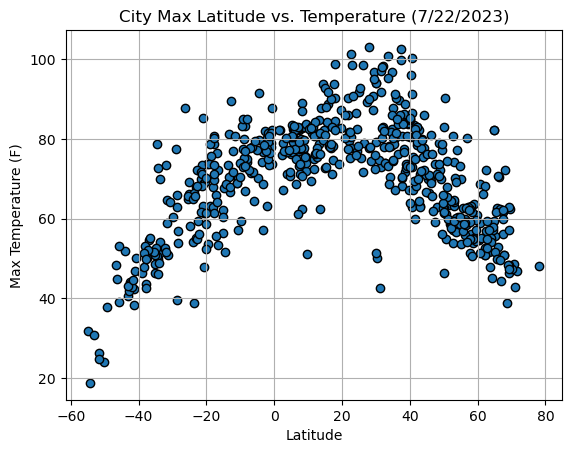

In [40]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (7/22/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

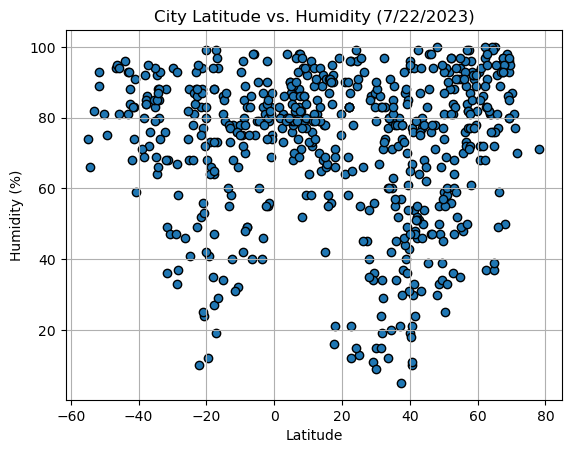

In [41]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (7/22/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

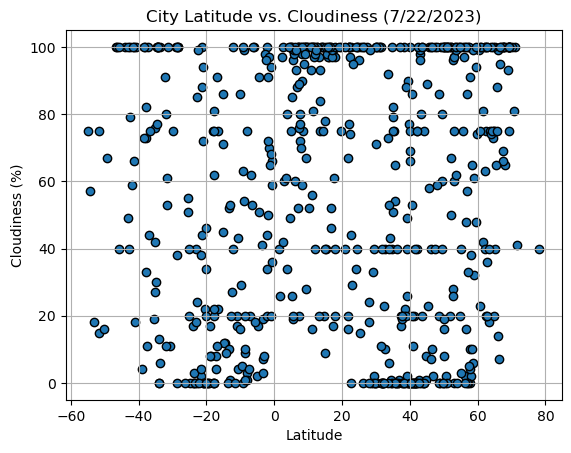

In [42]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (7/22/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

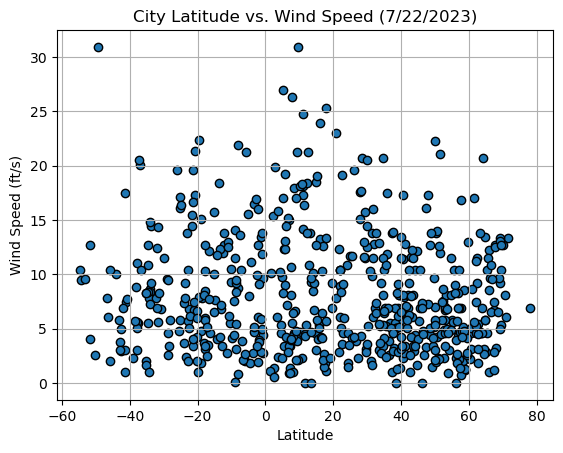

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (7/22/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (ft/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pandan,14.0453,124.1694,79.66,89,100,10.07,PH,1690062686
1,hamilton,39.1834,-84.5333,84.43,49,40,6.91,US,1690062574
4,tazovsky,67.4667,78.7000,56.25,97,69,6.73,RU,1690062687
8,najran,17.4924,44.1277,93.85,16,61,1.86,SA,1690062685
10,xinzhi,36.4989,111.7047,76.37,52,0,3.87,CN,1690062689


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,murray bridge,-35.1167,139.2667,46.35,83,76,8.28,AU,1690062687
3,uturoa,-16.7333,-151.4333,76.57,73,91,12.10,PF,1690062687
5,waitangi,-43.9535,-176.5597,51.82,96,100,10.00,NZ,1690062687
6,grytviken,-54.2811,-36.5092,18.73,66,57,9.51,GS,1690062688
7,nkove,-7.9500,30.8500,74.16,49,3,8.77,TZ,1690062688


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6304574119554


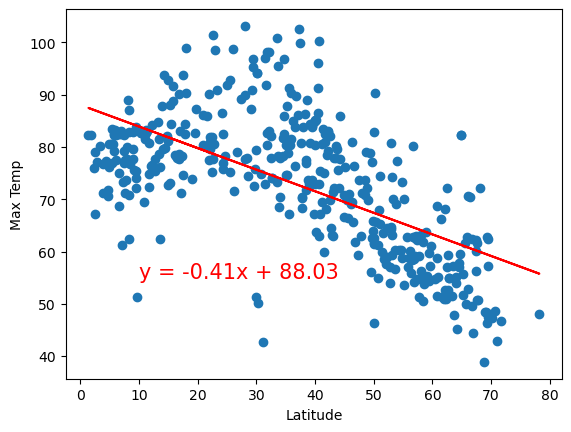

In [50]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,55),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.8173321007875881


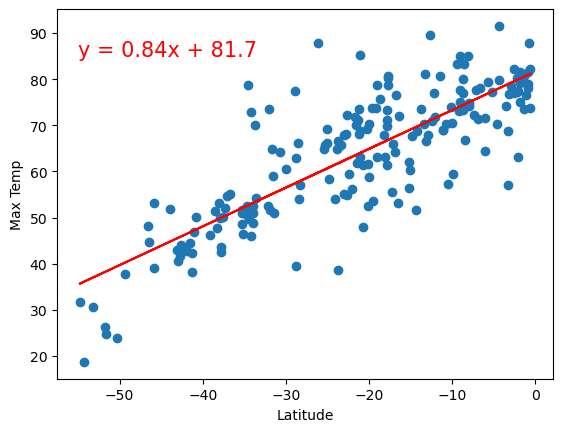

In [55]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.010982171441612142


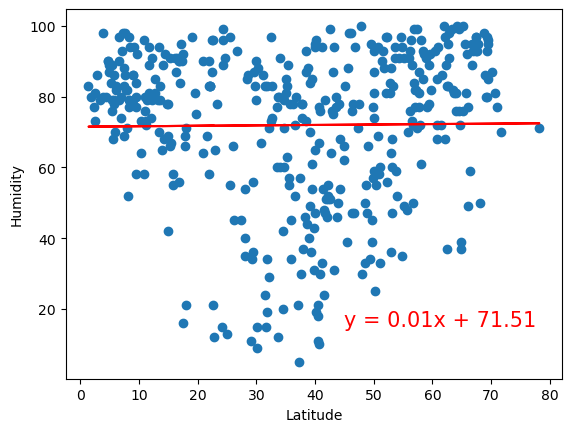

In [58]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.1592862243334551


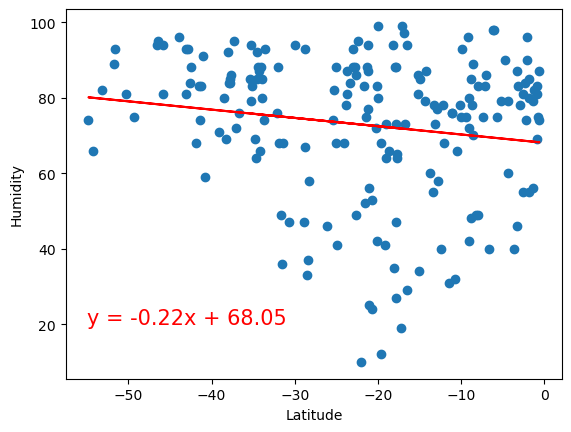

In [59]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.10971741344993864


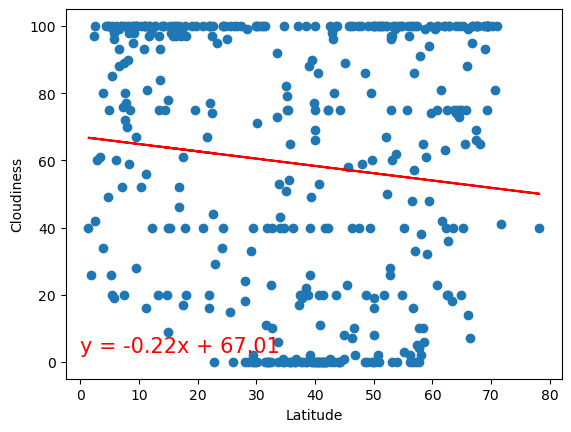

In [66]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,3),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.2007291685396618


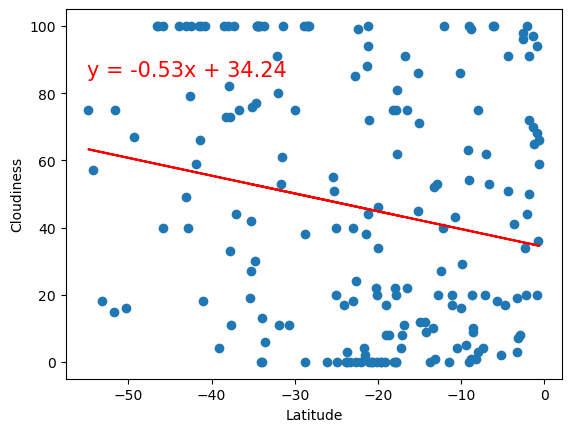

In [68]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.17581151796154482


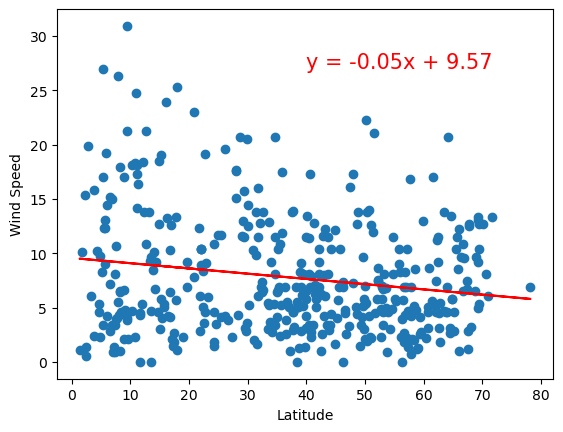

In [70]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,27),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.01002306336395081


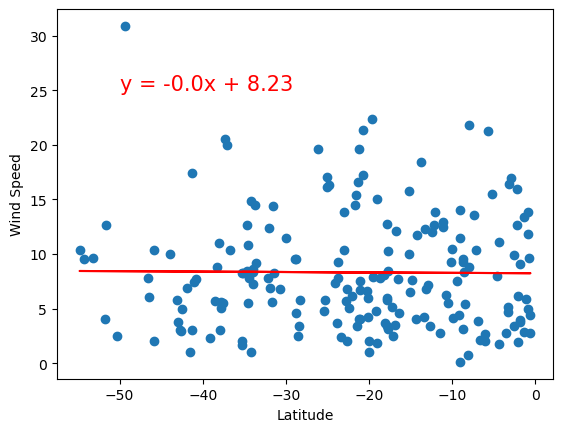

In [72]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE